![NYC Skyline](nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data.
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

#EDA Project 1

In [127]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Begin coding here ...
# Use as many cells as you like
# ### import files from google drive
import gdown
# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
# df_price = pd.read_csv('data/airbnb_price.csv')
df_price = pd.read_csv("/content/drive/MyDrive/EDA-Project-Airbnb-Market-Trends-main/data/airbnb_price.csv")
df_price.head()

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [136]:
df_room_type = pd.read_excel("/content/drive/MyDrive/EDA-Project-Airbnb-Market-Trends-main/data/airbnb_room_type.xlsx")

df_room_type['room_type'] = df['room_type'].str.title()
df_room_type.head()



,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire Home/Apt
1,3831,Cozy Entire Floor of Brownstone,Entire Home/Apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt
3,5178,Large Furnished Room Near B'way,Private Room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt


In [130]:
df_last_review = pd.read_csv("/content/drive/MyDrive/EDA-Project-Airbnb-Market-Trends-main/data/airbnb_last_review.tsv", sep='\t')
df_last_review.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


## Basic Analysis
1.	Dates of Reviews
o	What are the dates of the earliest and most recent reviews?
	Store these values as two separate variables, earliest_review and most_recent_review.
2.	Private Room Listings
o	How many of the listings are private rooms?
	Save this count into a variable called nb_private_rooms.
3.	Average Price Calculation
o	What is the average listing price?
	Round to the nearest two decimal places and store it in a variable called avg_price.
4.	Summary Table
o	Combine the calculated values into a new DataFrame called review_dates with the following columns (in order): first_reviewed, last_reviewed, nb_private_rooms, and avg_price. The DataFrame should contain only one row of values.


In [131]:
# 1) Dates of Reviews
# What are the dates of the earliest and most recent reviews?
#Store these values as two separate variables, earliest_review and most_recent_review.
earliest_review  = df_last_review['last_review'].min()
most_recent_review = df_last_review['last_review'].max()
print(earliest_review)
print(most_recent_review)


April 01 2019
May 31 2019


In [137]:
# 2)Private Room Listings
# How many of the listings are private rooms?
# Save this count into a variable called nb_private_rooms.
nb_private_rooms = df_room_type['room_type'].value_counts()['Private Room']
nb_private_rooms

# Result not matched

11356

In [138]:
print(df_room_type['room_type'].value_counts())

room_type
Entire Home/Apt    13266
Private Room       11356
Shared Room          587
Name: count, dtype: int64


In [140]:
#nb_private_rooms - convert room type in to string lover or upper or title 'room_type'
# i convert in str lower case
nb_private_rooms = df_room_type['room_type'].value_counts()['Private Room']
nb_private_rooms

11356

In [141]:
# 3.	Average Price Calculation
# 	What is the average listing price?
# Round to the nearest two decimal places and store it in a variable called avg_price.

# Soltution
# Replace dollars from price column and make price1 varible column
df_price['price1'] = df_price['price'].str.replace(' dollars',".000")
# Convert to numeric and round to 2 decimal places
df_price["price1"] = pd.to_numeric(df_price["price1"]).round(2)
# df_price["price1"] = pd.to_numeric(df_price["price1"]).map('{:.2f}'.format)
df_price

,listing_id,price,nbhood_full,price1
0,2595,225 dollars,"Manhattan, Midtown",225.0
1,3831,89 dollars,"Brooklyn, Clinton Hill",89.0
2,5099,200 dollars,"Manhattan, Murray Hill",200.0
3,5178,79 dollars,"Manhattan, Hell's Kitchen",79.0
4,5238,150 dollars,"Manhattan, Chinatown",150.0
...,...,...,...,...
25204,36425863,129 dollars,"Manhattan, Upper East Side",129.0
25205,36427429,45 dollars,"Queens, Flushing",45.0
25206,36438336,235 dollars,"Staten Island, Great Kills",235.0
25207,36442252,100 dollars,"Bronx, Mott Haven",100.0


In [142]:
avg_price = df_price['price1'].mean().round(2)
avg_price

141.78

In [143]:
#4)Summary Table
#Combine the calculated values into a new DataFrame called --
#-- review_dates with the following
# columns (in order): first_reviewed, last_reviewed, nb_private_rooms, and avg_price.
#The DataFrame should contain only one row of values.

# make a new datafram
review_dates = pd.DataFrame(
    {"first_reviewed": [earliest_review],
     "last_reviewed": [most_recent_review],
     "nb_private_rooms": [nb_private_rooms],
     "avg_price": [avg_price]
    }
)

review_dates


,first_reviewed,last_reviewed,nb_private_rooms,avg_price
0,April 01 2019,May 31 2019,11356,141.78


## Intermediate Analysis

In [144]:
# 5.	Neighborhood Trends
# Which neighborhoods have the highest and lowest average listing prices?
# Create a DataFrame with columns neighborhood, average_price, and number_of_listings for the top 5 most expensive neighborhoods.

# Solution
# Group by neighborhood, calculate average price, and count listings.
average_price = df_price.groupby(["nbhood_full"])["price1"].mean().sort_values(ascending=False).round(2)
number_of_listings = df_price.groupby(["nbhood_full"])["listing_id"].count()
# Sort neighborhoods by average price and extract the top 5.

neighborhood_stats = pd.DataFrame({
    "average_price": average_price,
    "number_of_listings": number_of_listings
}).sort_values("average_price", ascending=False)

neighborhood_stats.head(5)


,average_price,number_of_listings
nbhood_full,,
"Brooklyn, Sea Gate",805.00,2
"Manhattan, Tribeca",396.70,61
"Manhattan, Flatiron District",342.06,36
"Manhattan, NoHo",335.02,41
"Manhattan, SoHo",299.16,191


In [145]:
#6.	Word Analysis in Descriptions
#Find the top 10 most frequently used words in the description column (excluding stopwords like "the," "and," etc.).
# Use pandas.Series.str.split and explore the Counter class from the collections module.
#df_room_type = df_airbnb_room_type.copy()
df_room_type.head()


,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire Home/Apt
1,3831,Cozy Entire Floor of Brownstone,Entire Home/Apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt
3,5178,Large Furnished Room Near B'way,Private Room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt


In [146]:
# Tokenize text in the description column, remove stopwords, and count occurrences.

from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download the stopwords dataset
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [147]:
descriptions = df_room_type['description'].dropna().astype(str)
stop_words = set(stopwords.words('english'))
words = Counter(" ".join(descriptions).lower().split())
common_words = {word: count for word, count in words.items() if word not in stop_words}
top_words = sorted(common_words.items(), key=lambda x: x[1], reverse=True)[:10]
for i in top_words:
  print(i)
print(top_words)

('room', 4762)
('private', 3974)
('bedroom', 3468)
('apartment', 2952)
('cozy', 2556)
('brooklyn', 1933)
('studio', 1848)
('2', 1736)
('apt', 1731)
('&', 1688)
[('room', 4762), ('private', 3974), ('bedroom', 3468), ('apartment', 2952), ('cozy', 2556), ('brooklyn', 1933), ('studio', 1848), ('2', 1736), ('apt', 1731), ('&', 1688)]


##Advanced Analysis

In [148]:
#7.	Room Type Comparison
#	Compare the average prices for each room_type (shared rooms, private rooms, entire homes/apartments).
#	Create a bar chart visualizing the differences.

# Solution

# join or merge the 2 datafram (df_price  and df_room_type)
inner_join_df = pd.merge(df_price, df_room_type, on="listing_id")
inner_join_df.head()



,listing_id,price,nbhood_full,price1,description,room_type
0,2595,225 dollars,"Manhattan, Midtown",225.0,Skylit Midtown Castle,Entire Home/Apt
1,3831,89 dollars,"Brooklyn, Clinton Hill",89.0,Cozy Entire Floor of Brownstone,Entire Home/Apt
2,5099,200 dollars,"Manhattan, Murray Hill",200.0,Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt
3,5178,79 dollars,"Manhattan, Hell's Kitchen",79.0,Large Furnished Room Near B'way,Private Room
4,5238,150 dollars,"Manhattan, Chinatown",150.0,Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt


In [151]:
avg_price_room_type = inner_join_df.groupby('room_type')['price1'].mean()
avg_price_room_type

# not matched

,price1
room_type,
Entire Home/Apt,197.166667
Private Room,81.638165
Shared Room,53.465077


In [152]:
# convert room_type in same alphabat case

inner_join_df.head()

avg_price_room_type = inner_join_df.groupby('room_type')['price1'].mean().round(2)
avg_price_room_type

,price1
room_type,
Entire Home/Apt,197.17
Private Room,81.64
Shared Room,53.47


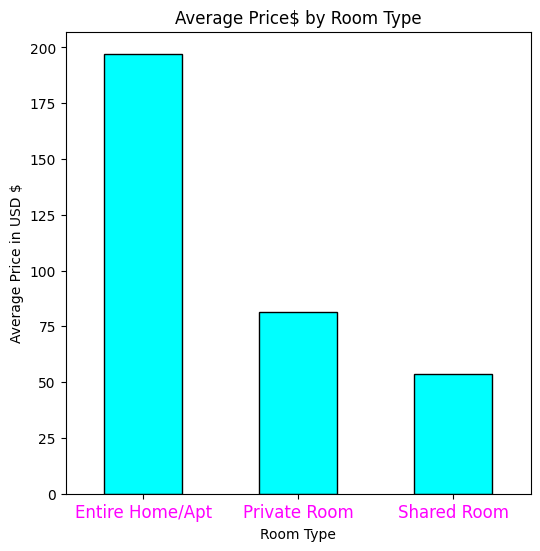

In [153]:
# Compare average prices for each room_type and visualize using a bar chart.

bar_chart = avg_price_room_type.plot(kind='bar',title='Average Price$ by Room Type',
                                     color='cyan', edgecolor='black',
                                     xlabel='Room Type', ylabel='Average Price in USD $',
                                     figsize=(6, 6))

plt.xticks(rotation=0,size= 12,color="magenta")  # 0 degrees for horizontal orientation
#ax.set_facecolor('white')
bar_chart
# Valid plot kinds: ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')
plt.show() # Display the chart

<Axes: title={'center': 'Reviews Over Time'}, xlabel='Year-Month', ylabel='Number of Reviews'>

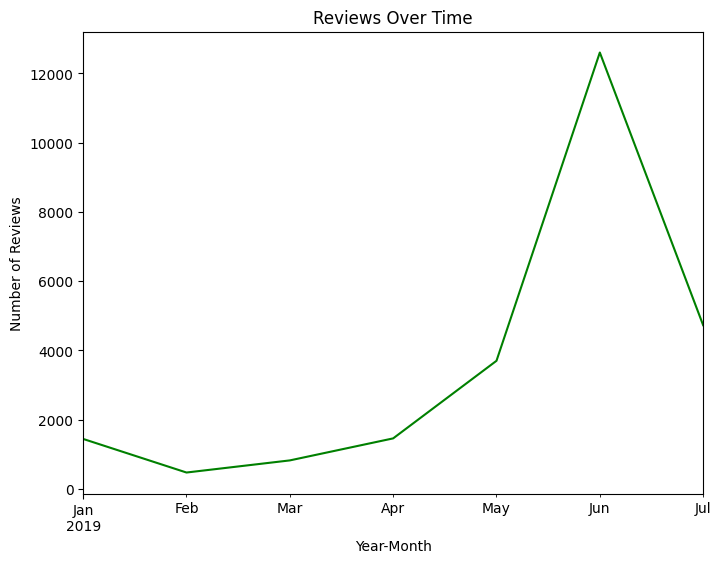

In [154]:
# 8.	Trend Over Time
#	Analyze the number of reviews over time for all listings.
#	Plot a line graph showing the trend of reviews per month over the years. (Hint: Use pandas.to_datetime and groupby.)

# Solution
# Convert last_review to datetime, group by year-month, and count reviews.
df_last_review['last_review'] = pd.to_datetime(df_last_review['last_review'])
df_last_review['year_month'] = df_last_review['last_review'].dt.to_period('M')
reviews_per_month = df_last_review.groupby('year_month').size()
#reviews_per_month

reviews_per_month.plot(kind='line',
                       title='Reviews Over Time',
                       xlabel= "Year-Month",
                       ylabel= "Number of Reviews",
                       color='green',
                       figsize=(8, 6))
#plt.xlabel('Year-Month')
#plt.ylabel('Number of Reviews')
#plt.show()

In [155]:
df_last_review

,listing_id,host_name,last_review,year_month
0,2595,Jennifer,2019-05-21,2019-05
1,3831,LisaRoxanne,2019-07-05,2019-07
2,5099,Chris,2019-06-22,2019-06
3,5178,Shunichi,2019-06-24,2019-06
4,5238,Ben,2019-06-09,2019-06
...,...,...,...,...
25204,36425863,Rusaa,2019-07-07,2019-07
25205,36427429,H Ai,2019-07-07,2019-07
25206,36438336,Ben,2019-07-07,2019-07
25207,36442252,Blaine,2019-07-07,2019-07


Text(0, 0.5, 'Price')

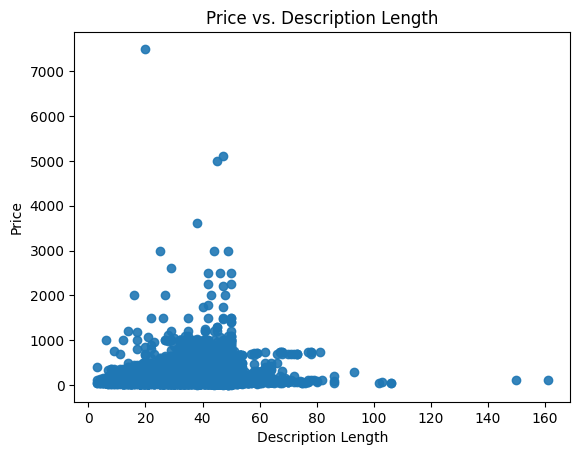

In [156]:
#9.	Exploring Unique Matplotlib Functions
# Create a scatter plot with a regression line showing the relationship between price and the length of the description.
# Use matplotlib.axes.Axes.annotate to highlight outliers in the graph. (Note: Students should explore this function independently.)

# Solution
#Plot price vs. description length with a regression line using Matplotlib.
df_room_type['desc_length'] = df_room_type['description'].str.len()
plt.scatter(df_room_type['desc_length'], df_price['price1'], alpha=0.9)
plt.title('Price vs. Description Length')
plt.xlabel('Description Length')
plt.ylabel('Price')


In [157]:

df = pd.merge(df_price, df_room_type, left_index=True, right_index=True, how='inner')
df = pd.merge(df,df_last_review, left_index=True, right_index=True, how='inner')
df

,listing_id_x,price,nbhood_full,price1,listing_id_y,description,room_type,desc_length,listing_id,host_name,last_review,year_month
0,2595,225 dollars,"Manhattan, Midtown",225.0,2595,Skylit Midtown Castle,Entire Home/Apt,21.0,2595,Jennifer,2019-05-21,2019-05
1,3831,89 dollars,"Brooklyn, Clinton Hill",89.0,3831,Cozy Entire Floor of Brownstone,Entire Home/Apt,31.0,3831,LisaRoxanne,2019-07-05,2019-07
2,5099,200 dollars,"Manhattan, Murray Hill",200.0,5099,Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt,41.0,5099,Chris,2019-06-22,2019-06
3,5178,79 dollars,"Manhattan, Hell's Kitchen",79.0,5178,Large Furnished Room Near B'way,Private Room,31.0,5178,Shunichi,2019-06-24,2019-06
4,5238,150 dollars,"Manhattan, Chinatown",150.0,5238,Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt,34.0,5238,Ben,2019-06-09,2019-06
...,...,...,...,...,...,...,...,...,...,...,...,...
25204,36425863,129 dollars,"Manhattan, Upper East Side",129.0,36425863,Lovely Privet Bedroom with Privet Restroom,Private Room,42.0,36425863,Rusaa,2019-07-07,2019-07
25205,36427429,45 dollars,"Queens, Flushing",45.0,36427429,No.2 with queen size bed,Private Room,24.0,36427429,H Ai,2019-07-07,2019-07
25206,36438336,235 dollars,"Staten Island, Great Kills",235.0,36438336,Seas The Moment,Private Room,15.0,36438336,Ben,2019-07-07,2019-07
25207,36442252,100 dollars,"Bronx, Mott Haven",100.0,36442252,1B-1B apartment near by Metro,Entire Home/Apt,29.0,36442252,Blaine,2019-07-07,2019-07


In [158]:
df_room_type

,listing_id,description,room_type,desc_length
0,2595,Skylit Midtown Castle,Entire Home/Apt,21.0
1,3831,Cozy Entire Floor of Brownstone,Entire Home/Apt,31.0
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt,41.0
3,5178,Large Furnished Room Near B'way,Private Room,31.0
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt,34.0
...,...,...,...,...
25204,36425863,Lovely Privet Bedroom with Privet Restroom,Private Room,42.0
25205,36427429,No.2 with queen size bed,Private Room,24.0
25206,36438336,Seas The Moment,Private Room,15.0
25207,36442252,1B-1B apartment near by Metro,Entire Home/Apt,29.0


<ipython-input-160-26752994a53b>:40: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



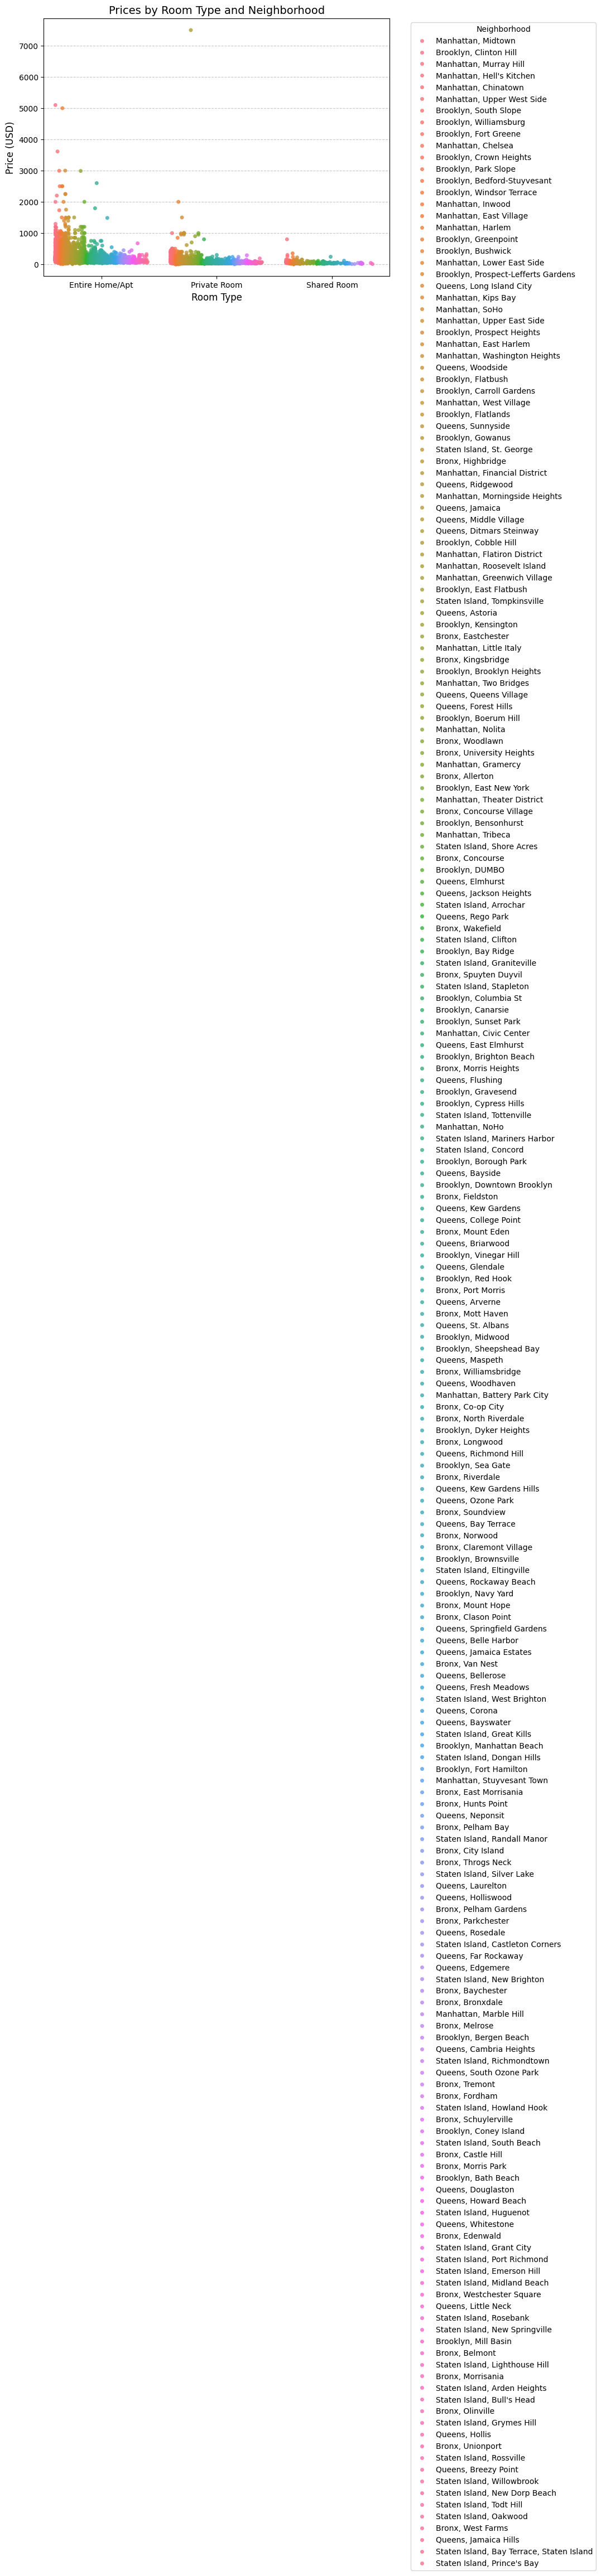

In [160]:
# 10.	Exploring Unique Seaborn Functions
# Generate a strip plot for prices grouped by room_type using the hue parameter to distinguish neighborhoods.
# Students should explore the seaborn.stripplot function

#Solution
#df_price = price_data.copy
#df_room_type =room_type_data.copy
#df_last_review = review_data.copy

import seaborn as sns

# Merge the data on 'listing_id'
df = pd.merge(df_price, df_room_type, left_index=True, right_index=True, how='inner')
df = pd.merge(df,df_last_review, left_index=True, right_index=True, how='inner')
# df['room_type'] = df['room_type'].str.title()

# Clean the data
df["price"] = pd.to_numeric(df["price"], errors="coerce")
#df.dropna(subset=["price", "room_type", "nbhood_full"], inplace=True)

# Strip plot
plt.figure(figsize=(8, 6))
sns.stripplot(
    data=df,
    x="room_type",
    y="price1",
    hue="nbhood_full",
    dodge=True,  # Separates points by neighborhoods
    jitter=0.20,  # Adds randomness to avoid overlapping points
    alpha=0.80,  # Transparency for better readability
    palette="husl"  # Custom color palette
)

# Add labels and title
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.title("Prices by Room Type and Neighborhood", fontsize=14)
plt.legend(title="Neighborhood", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [161]:
df

,listing_id_x,price,nbhood_full,price1,listing_id_y,description,room_type,desc_length,listing_id,host_name,last_review,year_month
0,2595,NaN,"Manhattan, Midtown",225.0,2595,Skylit Midtown Castle,Entire Home/Apt,21.0,2595,Jennifer,2019-05-21,2019-05
1,3831,NaN,"Brooklyn, Clinton Hill",89.0,3831,Cozy Entire Floor of Brownstone,Entire Home/Apt,31.0,3831,LisaRoxanne,2019-07-05,2019-07
2,5099,NaN,"Manhattan, Murray Hill",200.0,5099,Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt,41.0,5099,Chris,2019-06-22,2019-06
3,5178,NaN,"Manhattan, Hell's Kitchen",79.0,5178,Large Furnished Room Near B'way,Private Room,31.0,5178,Shunichi,2019-06-24,2019-06
4,5238,NaN,"Manhattan, Chinatown",150.0,5238,Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt,34.0,5238,Ben,2019-06-09,2019-06
...,...,...,...,...,...,...,...,...,...,...,...,...
25204,36425863,NaN,"Manhattan, Upper East Side",129.0,36425863,Lovely Privet Bedroom with Privet Restroom,Private Room,42.0,36425863,Rusaa,2019-07-07,2019-07
25205,36427429,NaN,"Queens, Flushing",45.0,36427429,No.2 with queen size bed,Private Room,24.0,36427429,H Ai,2019-07-07,2019-07
25206,36438336,NaN,"Staten Island, Great Kills",235.0,36438336,Seas The Moment,Private Room,15.0,36438336,Ben,2019-07-07,2019-07
25207,36442252,NaN,"Bronx, Mott Haven",100.0,36442252,1B-1B apartment near by Metro,Entire Home/Apt,29.0,36442252,Blaine,2019-07-07,2019-07


In [162]:
df_price

,listing_id,price,nbhood_full,price1
0,2595,225 dollars,"Manhattan, Midtown",225.0
1,3831,89 dollars,"Brooklyn, Clinton Hill",89.0
2,5099,200 dollars,"Manhattan, Murray Hill",200.0
3,5178,79 dollars,"Manhattan, Hell's Kitchen",79.0
4,5238,150 dollars,"Manhattan, Chinatown",150.0
...,...,...,...,...
25204,36425863,129 dollars,"Manhattan, Upper East Side",129.0
25205,36427429,45 dollars,"Queens, Flushing",45.0
25206,36438336,235 dollars,"Staten Island, Great Kills",235.0
25207,36442252,100 dollars,"Bronx, Mott Haven",100.0


##Visualization Questions

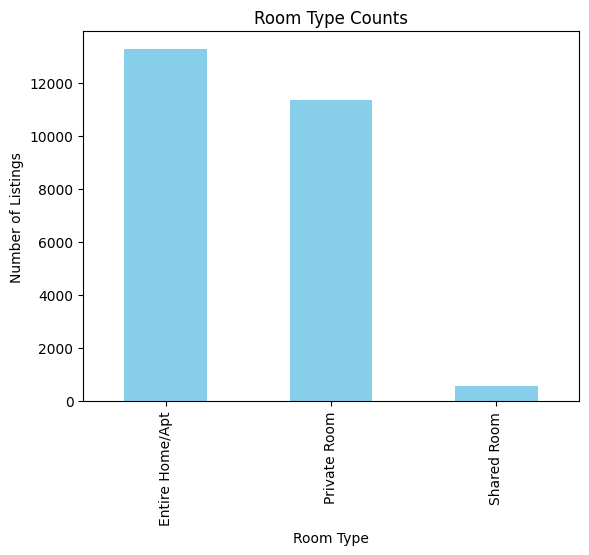

In [163]:
#11.	Bar Chart
#	Create a bar chart showing the count of listings for each room type.
#	Add proper labels, titles, and a legend.

#Solution

# Plot a bar chart of room type counts.

room_counts = df_room_type['room_type'].value_counts()
room_counts.plot(kind='bar', title='Room Type Counts', color='skyblue')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

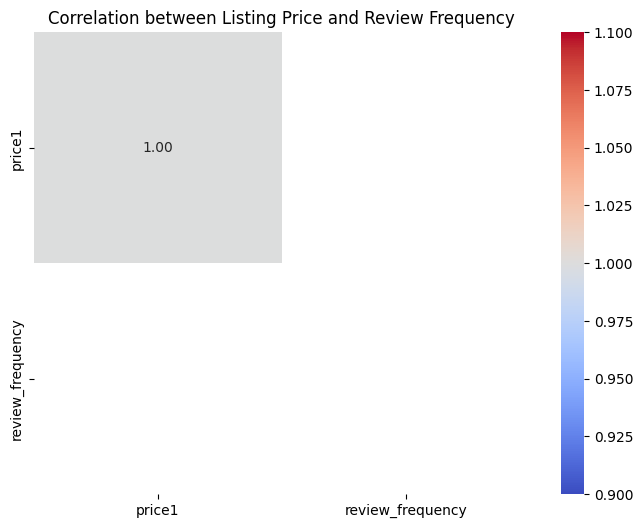

In [171]:
# prompt: # 12.	Heatmap
# # Generate a heatmap to show the correlation (if any) between listing price and the frequency of reviews.
# # Use the sns.heatmap function.
# please write code for me

# 12. Heatmap
# Generate a heatmap to show the correlation (if any) between listing price and the frequency of reviews.
# Use the sns.heatmap function.

# Assuming 'df' is the merged DataFrame from previous steps, and 'last_review' is already datetime
# Calculate the review frequency for each listing
df['last_review_year'] = df['last_review'].dt.year
review_counts = df.groupby('listing_id')['last_review_year'].count().reset_index(name='review_frequency')

# Merge review frequency back to the DataFrame
df = pd.merge(df, review_counts, on='listing_id', how='left')

# Create a correlation matrix
correlation_matrix = df[['price1', 'review_frequency']].corr()

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Listing Price and Review Frequency')
plt.show()

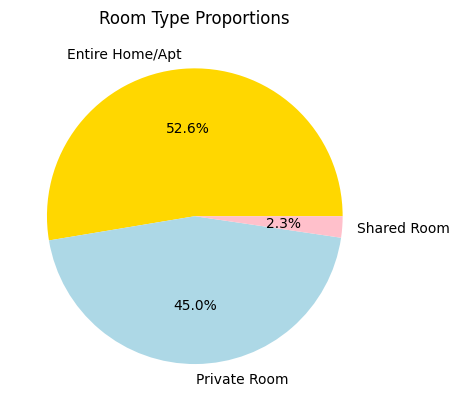

In [166]:
# 13.	Pie Chart
#	Create a pie chart to visualize the proportion of room types available.
#	Use a custom color palette and annotate the chart with percentages.

df_room_type

df_room_type['room_type'] = df_room_type['room_type'].str.title()

room_counts.plot(kind='pie', autopct='%1.1f%%', title='Room Type Proportions', colors=['gold', 'lightblue', 'pink'])
plt.ylabel('')
plt.show()

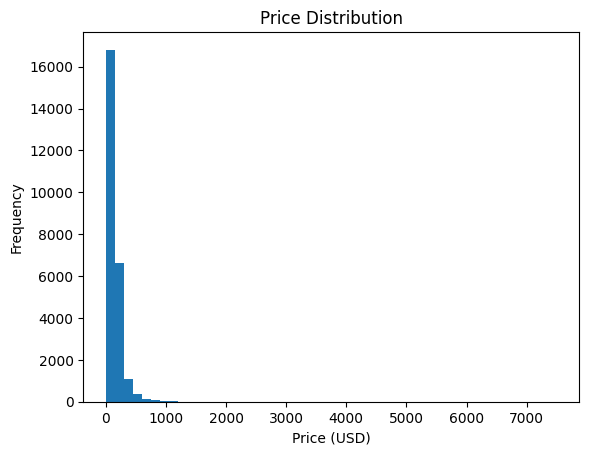

In [167]:
#14.	Histogram
#	Plot a histogram showing the distribution of listing prices.
#	Use bins to group prices in increments of $50.

# Show listing price distribution.

df_price['price1'].plot(kind='hist', bins=50, title='Price Distribution')
plt.xlabel('Price (USD)')
plt.show()

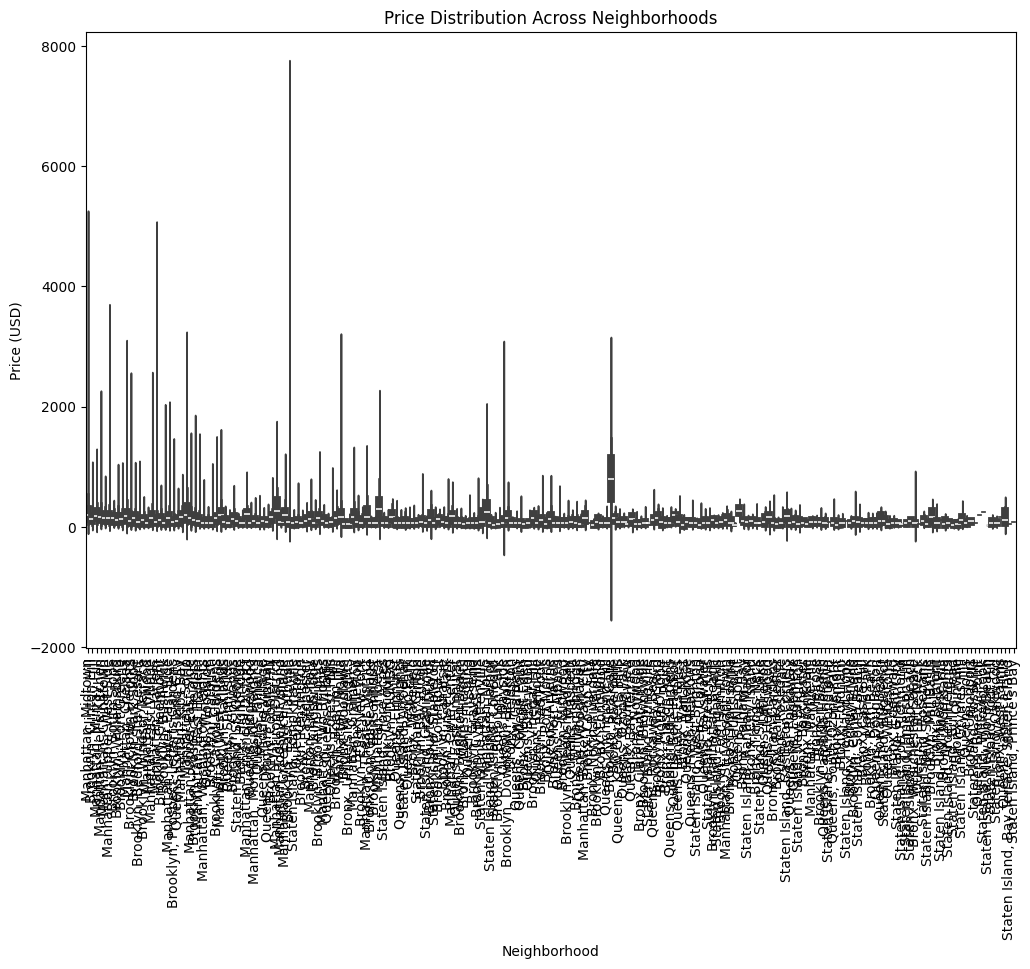

In [168]:
# 14.	Violin Plot
#	Create a violin plot to compare price distributions across neighborhoods.


# Create the violin plot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.violinplot(x='nbhood_full', y='price1', data=df)

# Customize the plot
plt.title('Price Distribution Across Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Price (USD)')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

plt.show()


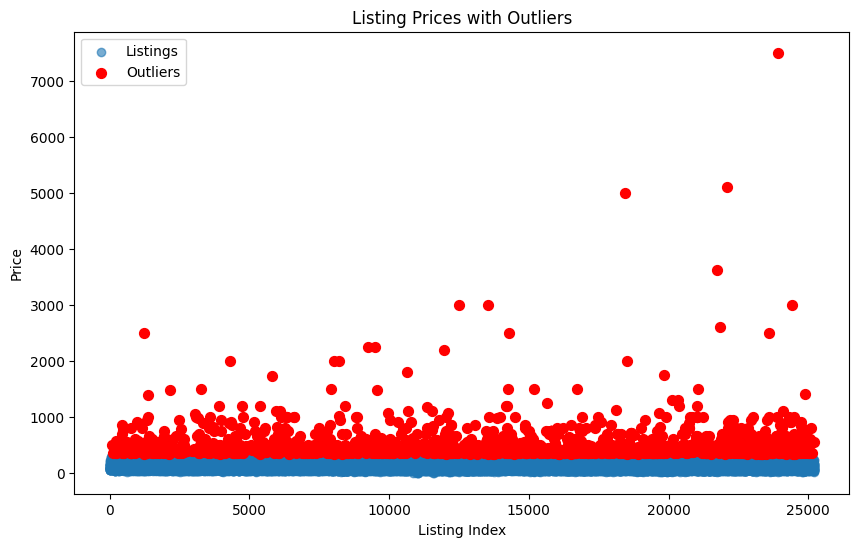

In [169]:
# 1.	Outlier Detection
#	Identify listings with unusually high prices (outliers) using the interquartile range (IQR) method.
#	Highlight these listings in a scatter plot.

# Calculate Q1, Q3, and IQR
Q1 = df_price['price1'].quantile(0.25)
Q3 = df_price['price1'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_price[(df_price['price1'] < lower_bound) | (df_price['price1'] > upper_bound)]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_price.index, df_price['price1'], label='Listings', alpha=0.6)
plt.scatter(outliers.index, outliers['price1'], color='red', label='Outliers', s=50)  # Highlight outliers in red

plt.xlabel('Listing Index')
plt.ylabel('Price')
plt.title('Listing Prices with Outliers')
plt.legend()
plt.show()

In [170]:
# 2.	Interactive Visualization
#	Explore plotly or altair to create an interactive visualization for price trends by neighborhood.
#	Include tooltips to display additional information such as room_type and description.

import plotly.express as px

# Assuming 'df' is your merged DataFrame with 'nbhood_full', 'price1', 'room_type', and 'description' columns.
# If not, replace 'df' with the correct DataFrame name.

fig = px.scatter(df,
                 x="nbhood_full",
                 y="price1",
                 color="room_type",
                 hover_data=["room_type", "description"],  # Include tooltips
                 title="Interactive Price Trends by Neighborhood")

fig.update_traces(marker=dict(size=8)) # Adjust marker size as needed
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [172]:
print("i really enjoy to do this assigments")

i really enjoy to do this assigments
